<a href="https://colab.research.google.com/github/DanielaCorado/Portfolio/blob/main/Liga%C3%A7%C3%B5es_911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ligações para 911**

Para este projeto estarei analisando um dataset disponível no Kaggle que contém chamadas para 911 (chamadas de emergência) no condado de Montgomery, Pensilvânia, no formato CSV. 

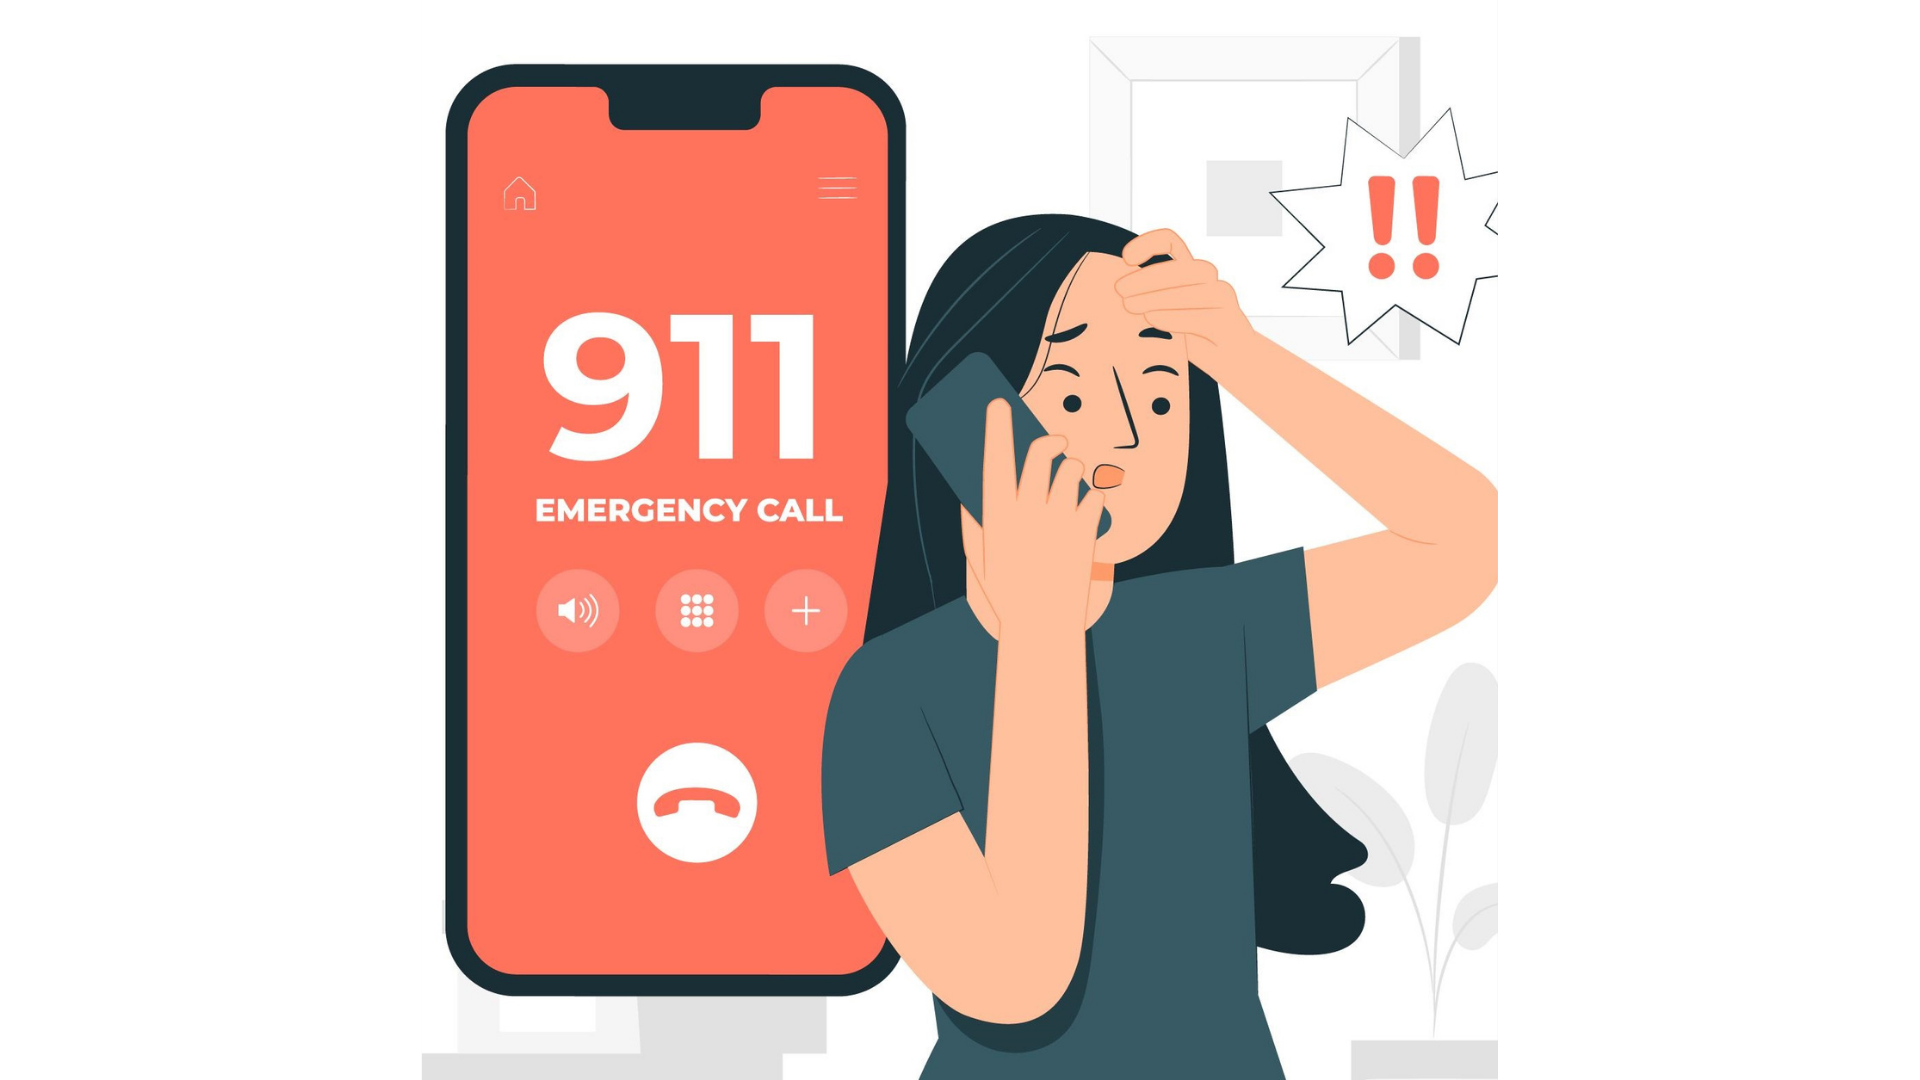

# **1 - Conhecendo os dados**

**Importando as bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Importando os dados**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/03 - Ligações 911/911.csv")
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Informações sobre os dados**

In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Descrição estatistica dos dados**

In [4]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


# **2 - Análises dos dados:**

**Top 5 Ceps nas chamadas 911 :**

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Top 5 cidades nas chamadas 911**

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Quantos Títulos exclusivos**

In [7]:
len(df['title'].value_counts())
#Outras formas de calcular:
# print(len(df['title'].unique()))
# print(df['title'].nunique())

110

**Qual a razão mais comum das chamadas do 911:**

In [8]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].head(5)


0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [9]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

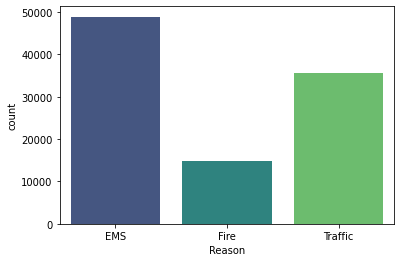

In [10]:
sns.countplot(x=df['Reason'],palette='viridis')
plt.show()


**Vizualizar a razão de acordo com o mês, dia e hora**

In [11]:
type(df['timeStamp'].iloc[1])

str

Convertar a coluna timeStamp de str para Datetime

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

Criar três novas colunas : Hour, Month, Day

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['Month'] = df['timeStamp'].apply(lambda x:x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x:x.dayofweek)
df['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

* Transfomar os dias da semana em srt

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

* Gráfico Day of Week de acordo com as razões

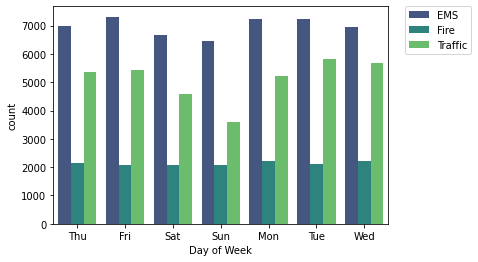

In [15]:
sns.countplot(x=df['Day of Week'],palette='viridis',hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05,1),loc =2, borderaxespad=0)
plt.show()

* Gráfico Month de acordo com as razões

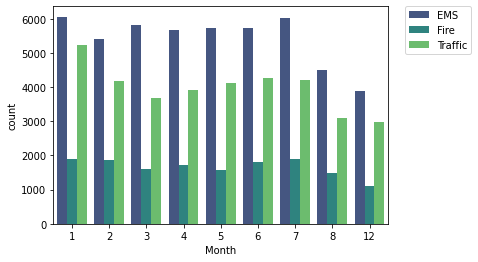

In [16]:
sns.countplot(x=df['Month'],palette='viridis',hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05,1),loc =2, borderaxespad=0)
plt.show()

* Gráfico Hour de acordo com as razões

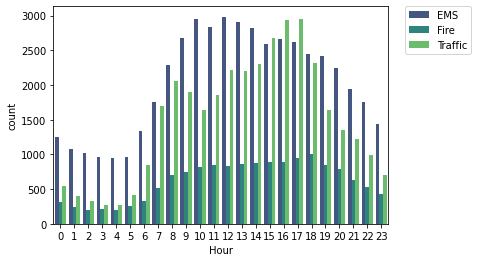

In [17]:
sns.countplot(x=df['Hour'],palette='viridis',hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05,1),loc =2, borderaxespad=0)
plt.show()

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423  


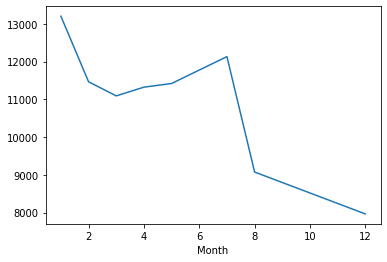

In [18]:
# Ao ver o gráfico dos meses percebe-se a falta de alguns meses
# Fazer então um tratamento de dados
byMouth = df.groupby('Month').count()
print(byMouth.head())
byMouth['twp'].plot()
plt.show()

* Modelo linear do número de chamadas por mês

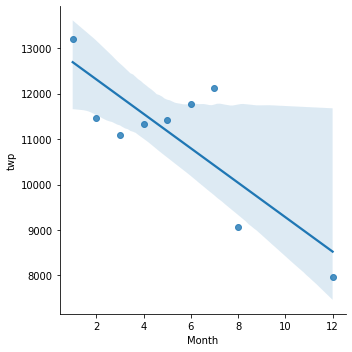

In [19]:
# No modelo linear x e y tem de ser coluna (Não pode ser index)
byMouth = byMouth.reset_index()
sns.lmplot(x='Month', y='twp',data=byMouth.reset_index())
plt.show()

In [20]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

* Agrupar os dados do msm dia para ver as chamadas por dia

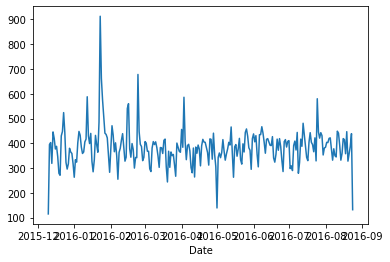

In [21]:
df.groupby('Date').count()['twp'].plot()
plt.show()


**Crie um gráfico para cada Razão**

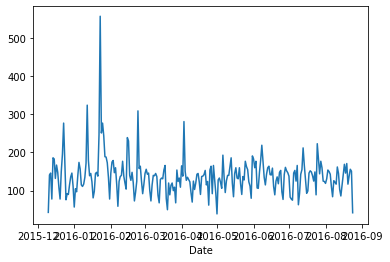

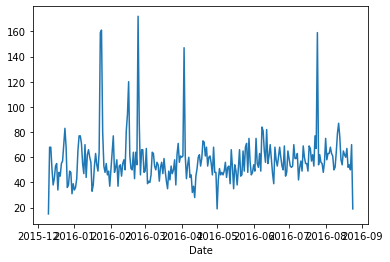

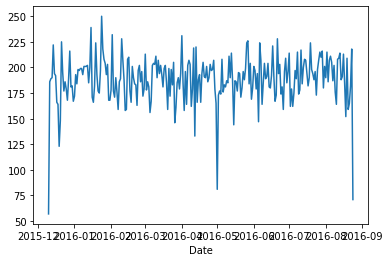

In [22]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.show()
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.show()
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.show()

**Criar mapa de calor com index = Dia das semanas e colunas = horas do dia**

Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
Day of Week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  931  980   
Mon          282  220  201  194  204  267  397  653  819  785  ...  869  913   
Sat          373  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  304  285  268  242  240  300  401  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  819  696  667  558  514  474  
Mon           988   997  885  746  612  496  471  325  
Sat           848   757  778  696  627  571  505  467  
Sun           663   714  670  654  537  461  415  330  
Thu           935  1011  810  698  617  553  424  354  

[5 rows x 24 columns]


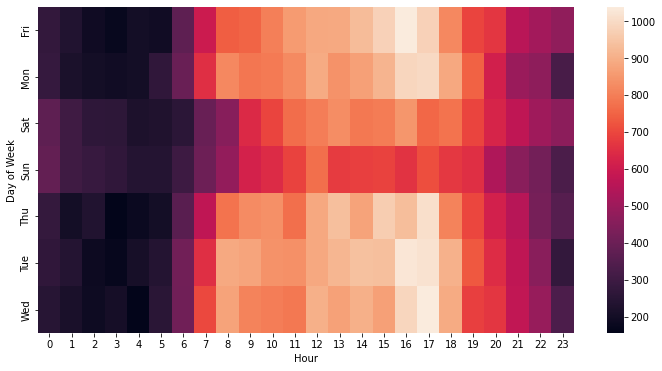

In [23]:
# Reorganizar os dados
dayHour = df.groupby(by=['Day of Week','Hour']).count()['twp'].unstack()
print(dayHour.head())
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)
plt.show()

**Criar um clustemap**

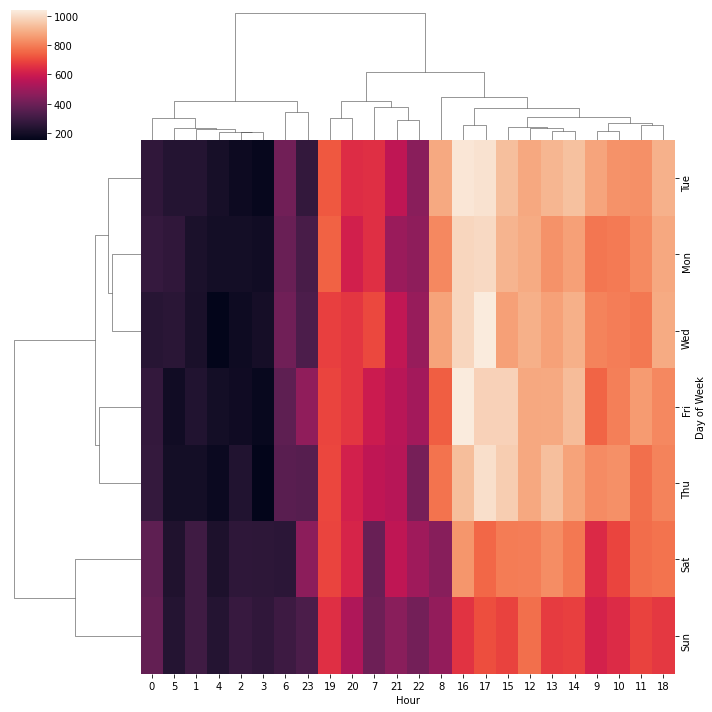

In [24]:

sns.clustermap(dayHour)
plt.show()

**Criar mapa de calor com index = Dia das semanas e colunas = mês**

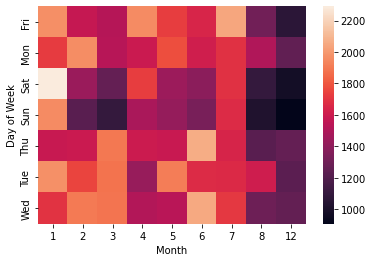

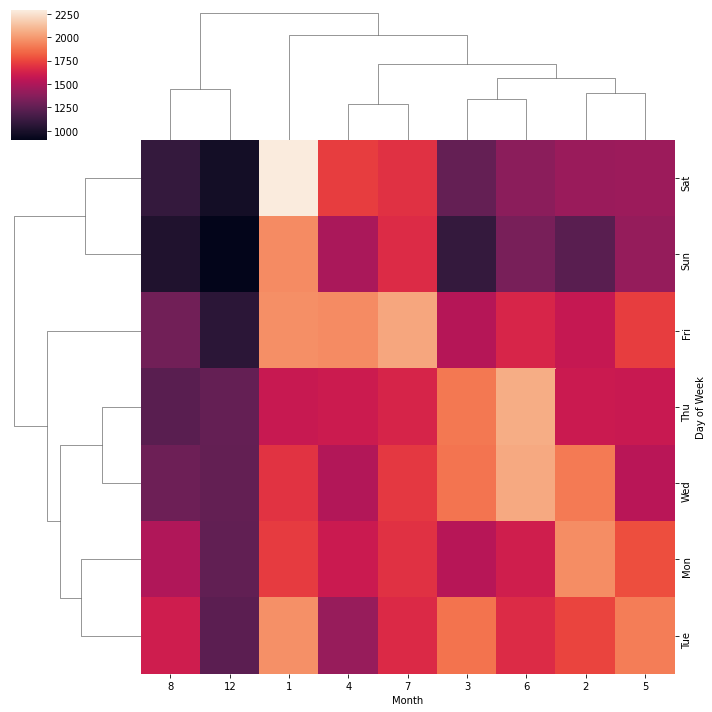

In [25]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['twp'].unstack()
sns.heatmap(dayMonth)
plt.show()

sns.clustermap(dayMonth)
plt.show()
